# Results for dihedral groups 


In [1]:
from loss import FpGroup_L_irr, FpGroup_L_rel, FpGroup_matrices

### 2 dimensional representations:
Lets define Dihedral group $D_{2n} = <s, r \mid s^2 = r^n = rsrs = 1>$.

In [ ]:
from sympy.combinatorics.fp_groups import FpGroup
from sympy.combinatorics.free_groups import free_group
import sympy

dim = 2
def D2n(n: int):
    F, s, r = free_group("s, r")
    relators = [s**2, r**n, r * s * r * s]
    return FpGroup(F, relators)

n = 3
group = D2n(n)
s = sympy.Symbol("s")
r = sympy.Symbol("r")

Parse the equation for $\mathcal L$:

In [ ]:
L_r = FpGroup_L_rel(group, dim)

In [4]:
L_irr = FpGroup_L_irr(group, dim)

In [5]:
L = L_r + L_irr

Collect parameters of the model (loss) - for every group element $z = x + iy$, ž $x$ and $y$ are two parameters of the model.

In [19]:
from loss import matrix_element_symbol
# params:
matrices = FpGroup_matrices(group, dim)

matrices[s]

Matrix([
[{x_s}_{0;0} + I*{y_s}_{0;0}, {x_s}_{0;1} + I*{y_s}_{0;1}],
[{x_s}_{1;0} + I*{y_s}_{1;0}, {x_s}_{1;1} + I*{y_s}_{1;1}]])

In [27]:
params = [matrix_element_symbol(name, generator, row, column) 
          for name in ["x", "y"] 
          for generator in [ s, r]
          for row in range(2)
          for column in range(2)]
print(f"Number of parameters is {len(params)}.")

Number of parameters is 16.


Get equations for $\frac{d \mathcal L}{d p}$, where $p$ is a parameter

In [23]:
# calculates dL/dp for every param
derivatives = {
    param : sympy.diff(L, param) for param in params
}

Convert equations to python functons

In [ ]:
from tqdm import tqdm
lambda_derivatives = {}
for param in tqdm(params, total=len(params)):
    lambda_derivatives[param] = sympy.lambdify(tuple(params), derivatives[param] )

  0%|          | 0/16 [00:00<?, ?it/s]

### Example of one trajectory
We will plot just $tr(\rho(r)$  and $tr(\rho(s)$

In [ ]:
#print(params)
#lambda_derivatives[params[0]]

TypeError: 'function' object is not subscriptable

TypeError: 'function' object is not subscriptable

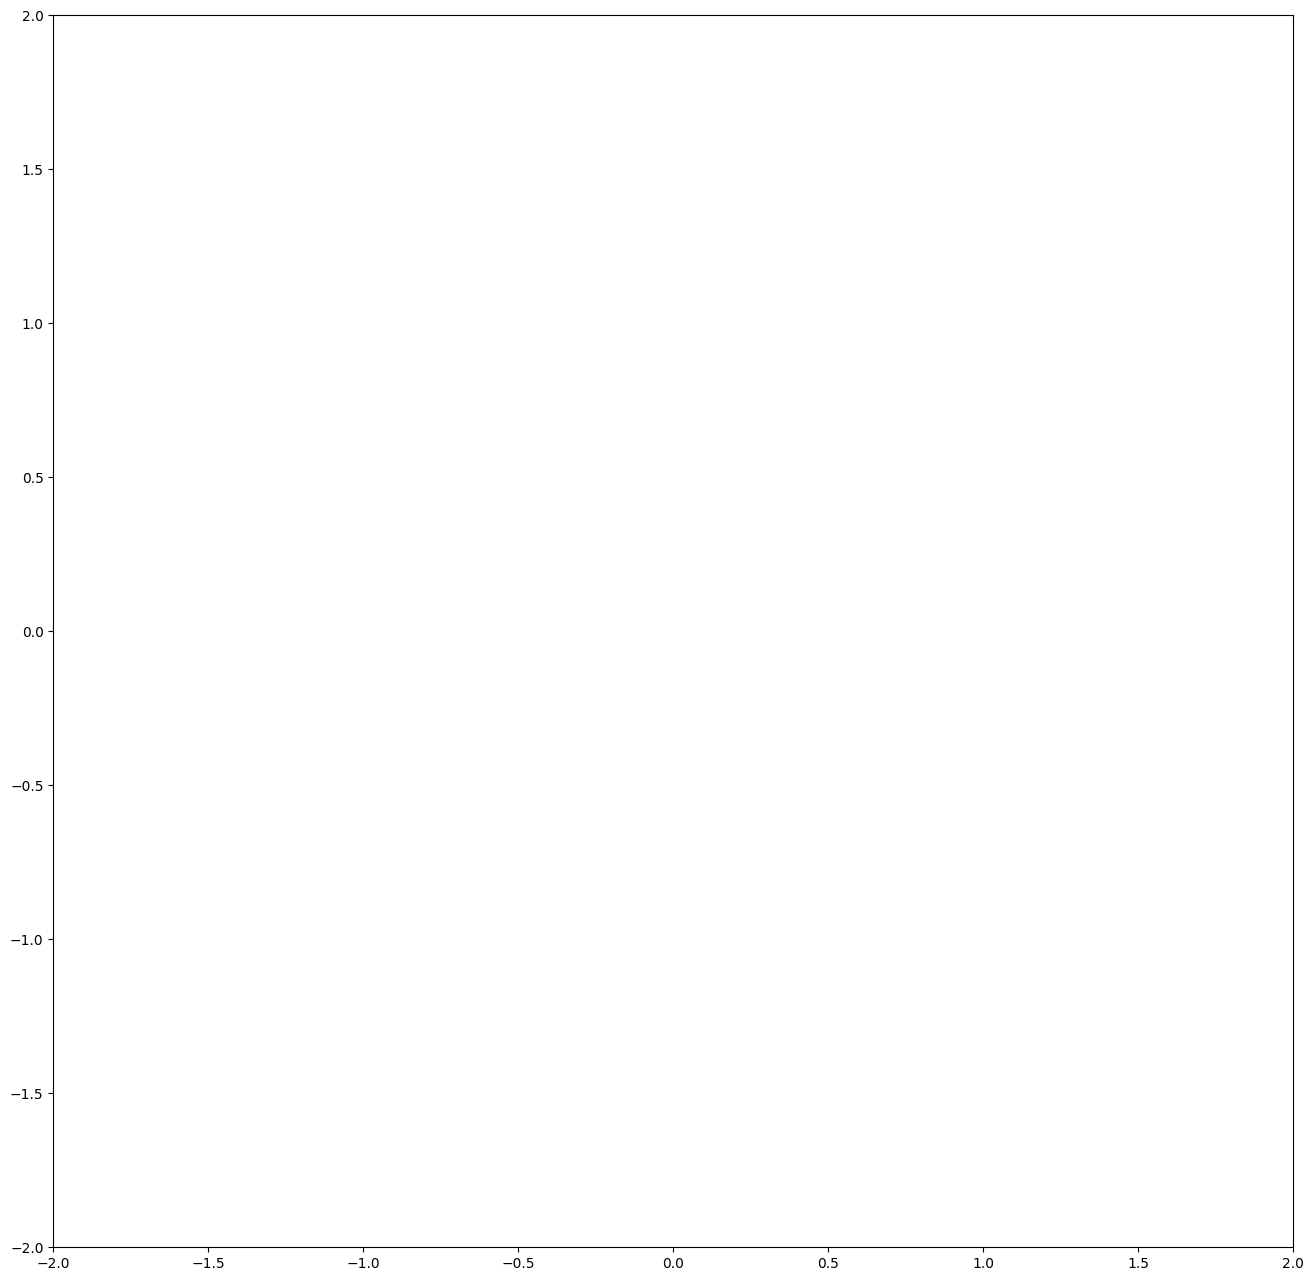

In [31]:
# example of one trajectory

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# sollve d(x,y)/dt = -gradL
def neg_grad(t, z):
    '''
    Returns a vector `(-L_p (z) for p in params)`.
    '''
    return [-lambda_derivatives[param](z) for param in params]




# Plot the solution in 2D (y vs x)
plt.figure(figsize=(16, 16))
ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# initial values - set every param to 1
p0 = [1. for _ in params]
#time frame 
t_max =1

# solve 
solution = solve_ivp(neg_grad, (0, t_max), p0)


cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=0, vmax=t_max)  # Normalize based on time range
# plot initial step
plt.plot(solution.y[0][0], solution.y[1][0], 'ro', label='Initial point', markersize=3)


# Plot the solution in 2D (y vs x) with color changing over time
for i in range(len(solution.t) - 1):
    plt.plot(solution.y[0][i:i+2], solution.y[1][i:i+2], color=cmap(norm(solution.t[i])), lw=2)#, marker= '>')
#plt.plot(solution.y[0], solution.y[1], label='Gradient flow trajectory')



plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trajectory of gradient flows ') 
plt.grid(True)
plt.show()